In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from matplotlib.ticker import ScalarFormatter

In [86]:
colors = plt.colormaps['plasma'].resampled(85)

In [4]:
f =  ScalarFormatter(useOffset=False, useMathText=True)
f.set_scientific(True)
f.set_powerlimits((0, 0))

def sci_notation(x):
    if x == 0:
        return "0"
    else:
        formatted = f"{x:.2e}"  # Converte in notazione scientifica
        coefficient, exponent = formatted.split('e')
        exponent = int(exponent)  # Converti l'esponente a intero
        return f"${coefficient} \\times 10^{{{exponent}}}$"  # Notazione LaTeX
    
    


In [114]:
K = 1.3e-23 # J / K
vc = 3e8 #m / s
h_pl = 6.62e-34 #J*s
T = 2.725 #K

In [74]:
z1 = np.geomspace(1.0e+2,5.0e+6,500)

## Green functions over all the redshift, hubble cooling and Xe are turned down

In [95]:
folder = 'full_gf/batch/PDE-non-linear'
x = []
DT = []
DI_N = []

z = []
Te = []
Tz = []

Xe=[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    a = op.iloc[:, 0].values
    x.append(a)
    b = op.iloc[:, 4].values
    DT.append(b)
    e = op.iloc[:, 6].values
    DI_N.append(e)


    if ((i>8) and (i<99)):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_00{i+1}.dat")
    else: 
        file_path2 = os.path.join(folder, f"Temperatures.delta-z_z_heat_{i+1}.dat")

    op2 = pd.read_csv(file_path2, skiprows=6, delimiter=' ', header=None)
    d= op2.iloc[:,0]
    z.append(d)
    e= op2.iloc[:,2]
    Te.append(e)
    f = op2.iloc[:,1]
    Tz.append(f)     


    if ((i>8) and (i<99)):
        file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_00{i+1}.dat")
    else: 
        file_path3 = os.path.join(folder, f"Xi.delta-z_z_heat_{i+1}.dat")
    
    op3 = pd.read_csv(file_path3, skiprows=6, delimiter=' ', header=None)

    g = op3.iloc[:,1]
    Xe.append(g)

In [116]:
x = np.array(x)
nu = K *x * int(Tz[499][3590]) /h_pl   #transform everythig in the frequency today

In [108]:
folder = 'full_gf/batch/PDE-non-linear/Greens'

z_vis= []
Jbb =[]

for i in range (len(z1)):
    if ((i>8) and (i<99)):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_0{i+1}.dat")
    elif(i<9):
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_00{i+1}.dat")
    else:
        file_path = os.path.join(folder, f"Dn_0.delta-z_z_heat_{i+1}.dat")
    op = pd.read_csv(file_path, skiprows=6, delimiter=' ', header=None)


    op = pd.read_csv(file_path, skiprows= lambda x: x not in [4], delimiter=' ', header=None)
    Jbb.append(op.iat[0,10])
    z_vis.append(op.iat[0,1])

We don't want to plot all the lines together, they are too many. We can split at the recombination (z = 3000)

32


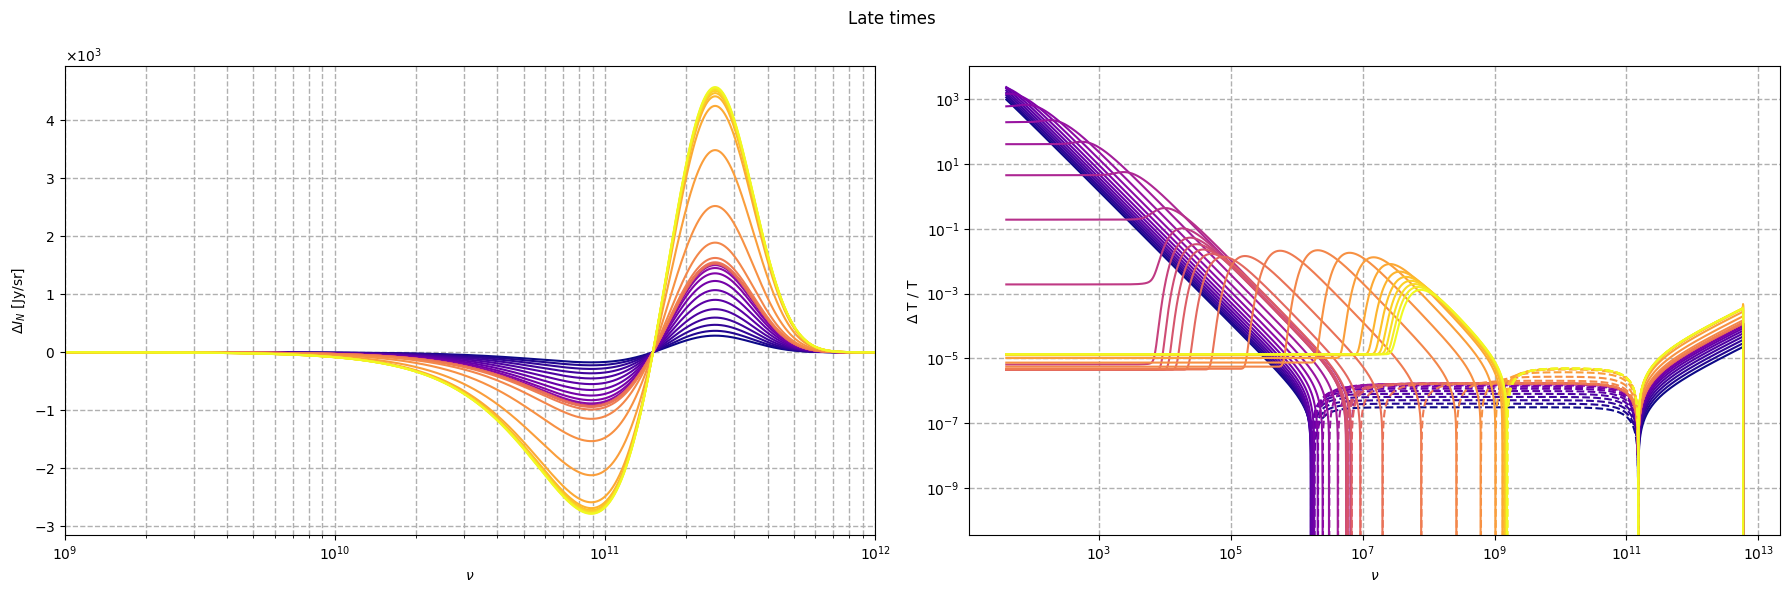

In [163]:
colors = plt.colormaps['plasma'].resampled(32)

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Late times ")

# Plot per DI_N2 (primo subplot)
col=0
for i in range(len(z1)):
    if((z1[i]<3000) and (i%5==0)):
        ax1.plot(nu[i], DI_N[i], label=f"z = {sci_notation(z1[i])}", color = colors(col))
        col +=1
print(col)

ax1.set_xscale('log')
ax1.set_xlim([1e+9, 1e+12])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("$\\nu$")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
col = 0
for i in range(len(z1)):
    if((z1[i]<3000) and (i%5==0)):
        ax2.plot(nu[i], DT[i], color = colors(col))
        ax2.plot(nu[i], -DT[i], color = colors(col), linestyle= "dashed")
        col += 1



ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlim([1e-9, 1e-7])
#ax2.set_ylim([-0.5e-3, 3e+3])
ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("$\\nu$")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

68


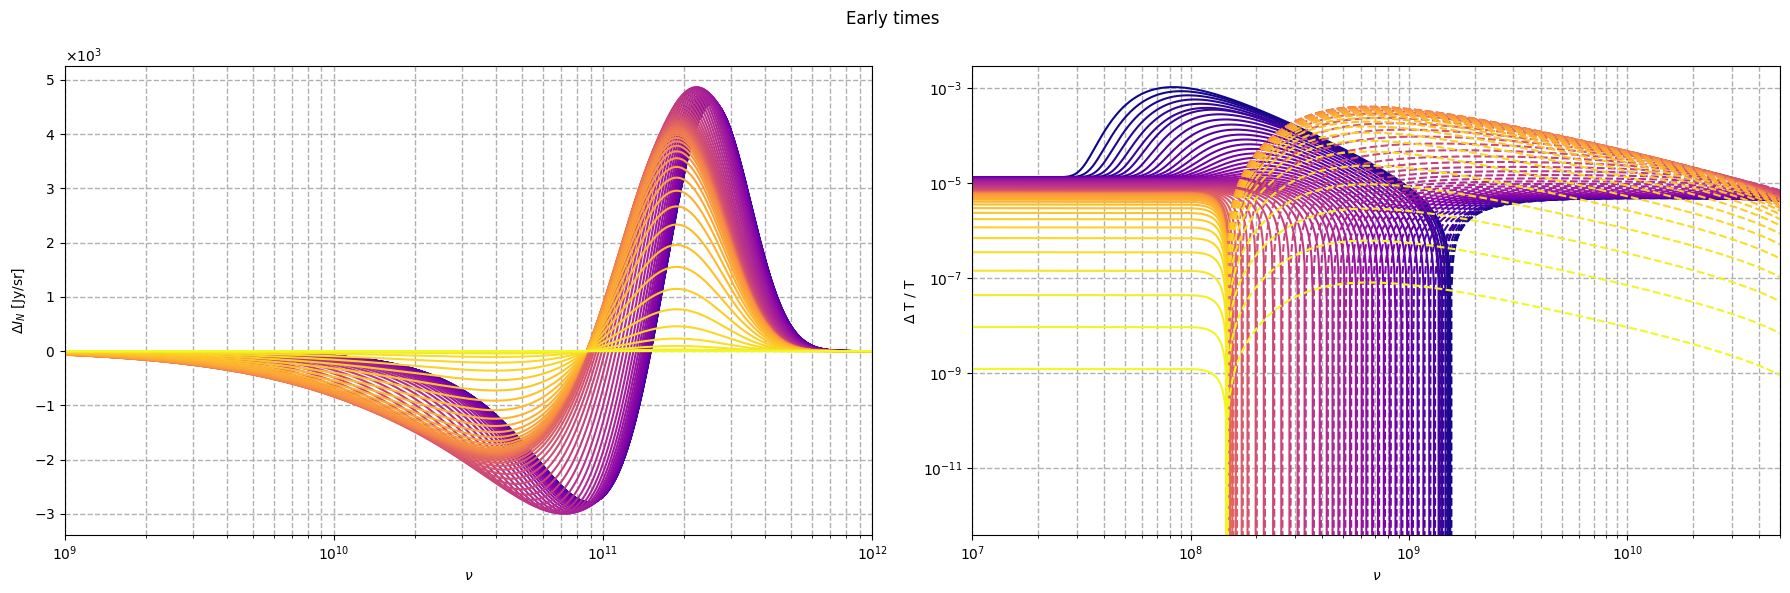

In [164]:
colors = plt.colormaps['plasma'].resampled(68)

# Crea la figura e i subplots (2 righe e 1 colonna)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle(f"Early times ")

# Plot per DI_N2 (primo subplot)
col=0 
for i in range(len(z1)):
    if((z1[i]>3000) and (i%5==0)):
        ax1.plot(nu[i], DI_N[i], label=f"z = {sci_notation(z1[i])}", color = colors(col))
        col +=1
print(col)

ax1.set_xscale('log')
ax1.set_xlim([1e+9, 1e+12])
ax1.set_ylabel("$\Delta I_{N}$ [Jy/sr]")
ax1.set_xlabel("$\\nu$")
#ax1.set_title("All $\Delta$ I_N curves")
ax1.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax1.legend()

# Plot per DT2 (secondo subplot)
col=0 
for i in range(len(z1)):
    if((z1[i]>3000) and (i%5==0)):
        ax2.plot(nu[i], DT[i], color = colors(col))
        ax2.plot(nu[i], -DT[i], color = colors(col), linestyle= "dashed")
        col +=1



ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim([1e+7, 5e+10])   #lines on the left
#ax2.set_xlim([5e+11, 1e+13])   #lines on the right
#ax2.set_ylim([-0.2e-3,0.4e-3])

ax2.set_ylabel("$\Delta$ T / T")
ax2.set_xlabel("$\\nu$")
ax2.grid(True, which = 'both',  linestyle='--', linewidth=1)
#ax2.legend()

ax1.yaxis.set_major_formatter(ScalarFormatter())    
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale
#ax2.yaxis.set_major_formatter(ScalarFormatter())
#ax2.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) 
# Aggiusta il layout
plt.tight_layout()
plt.show()

In [27]:
density = np.zeros(len(z1))
temp = np.zeros(len(z1))

for j in range (len(z1)):
    for i in range (len(x[j])-1):
        h = x[j][i+1] - x[j][i]
        temp[j] = temp[j] + DI_N[j][i]*h
    density[j] = (4*np.pi*K* T  /h_pl/vc) / (4.17e-14) * 1e-26 * temp[j]  

I = density / (1e-5)

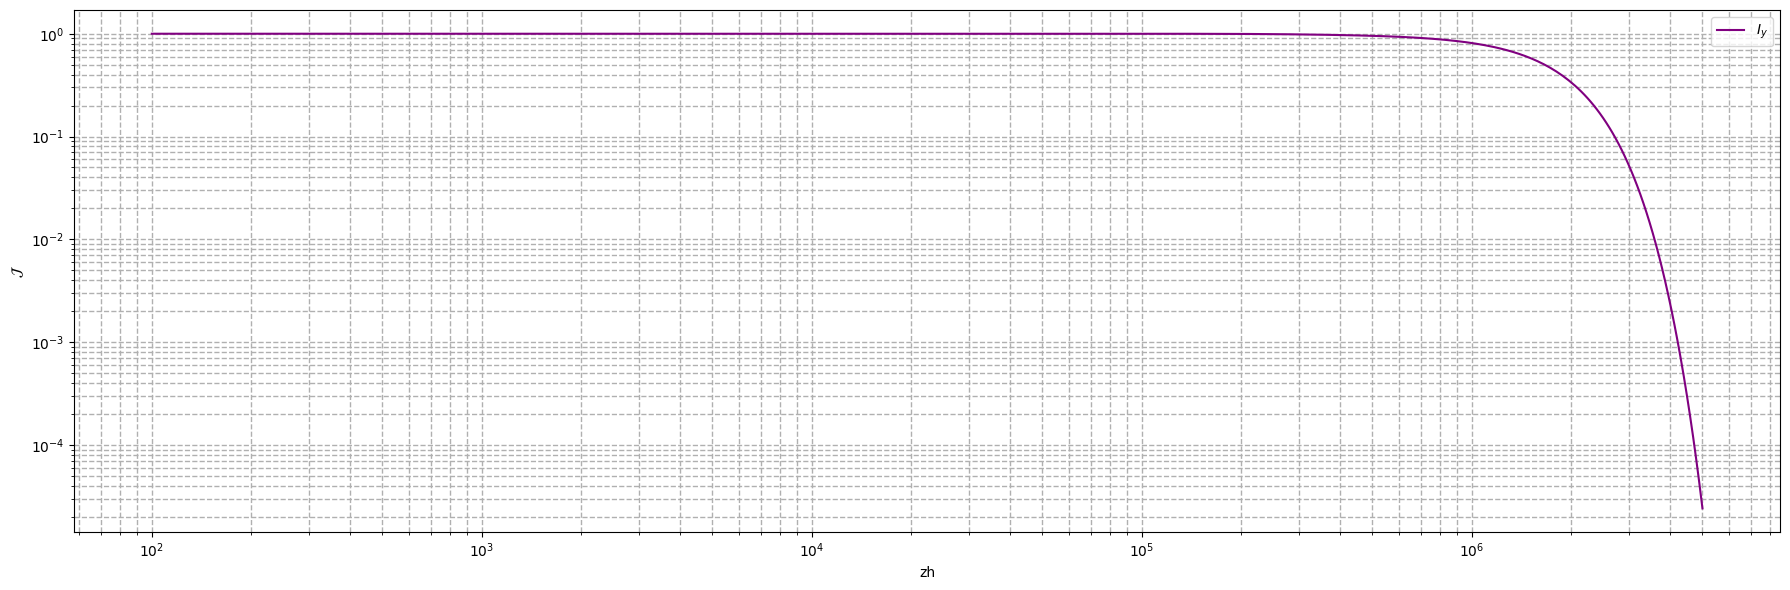

In [107]:
#Plot using the output and not my function integrated

Jbb = np.array(Jbb)
fig, ax = plt.subplots( figsize=(18, 6))
#fig.suptitle(f"Late time visibility function with hubble cooling ")

ax.plot(z_vis, Jbb, color = "purple", label= "$I_y$")
ax.plot(z_vis, -Jbb, color = "purple",linestyle = "dashed")


ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([100, 10000])
ax.set_ylabel("$\mathcal{J}$")
ax.set_xlabel("zh")
#ax1.set_title("All $\Delta$ I_N curves")
ax.grid(True, which = 'both',  linestyle='--', linewidth=1)
ax.legend()





#ax.yaxis.set_major_formatter(ScalarFormatter())    
#ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0),useMathText=True) #only y axis, it does not work on the log scale

plt.tight_layout()
plt.show()

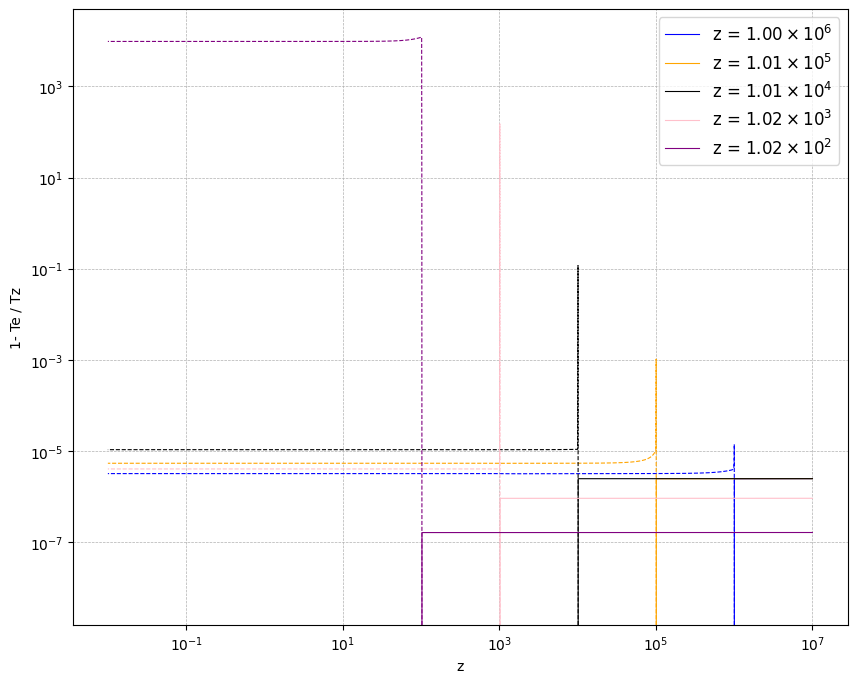

In [161]:
fig, ax = plt.subplots( figsize=(10,8))

for i in range (len(z1)):
    if(z1[i]>1e6):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "blue", label=f"z = {sci_notation(z1[i])}",linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "blue", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e5):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "orange",label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "orange", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e4):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "black", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "black", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e3):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "pink", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "pink", linestyle = "dashed")
        break

for i in range (len(z1)):
    if(z1[i]>1e2):
        ax.plot(z[i], (Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "purple", label=f"z = {sci_notation(z1[i])}", linestyle = "solid")
        ax.plot(z[i], -(Tz[i]-Te[i])/Tz[i], linewidth= "0.8", color = "purple", linestyle = "dashed")
        break



ax.set_xlabel("z")
ax.set_ylabel("1- Te / Tz")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


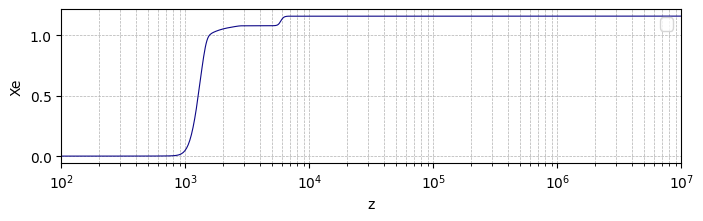

In [150]:
fig, ax = plt.subplots( figsize=(8,2))

#for i in range (len(z1)):
    #if(i%4==0):
ax.plot(z[0], Xe[0], linewidth= "0.8", color = colors(0), linestyle = "solid")
#ax.plot(z[0], -Xe[0], linewidth= "0.8", color = colors(0), linestyle = "dashed")




ax.set_xlabel("z")
ax.set_ylabel("Xe")
ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim([1e2, 1e7])
ax.grid(True, which = 'both',  linestyle='--', linewidth=0.5)
ax.legend(fontsize=12)